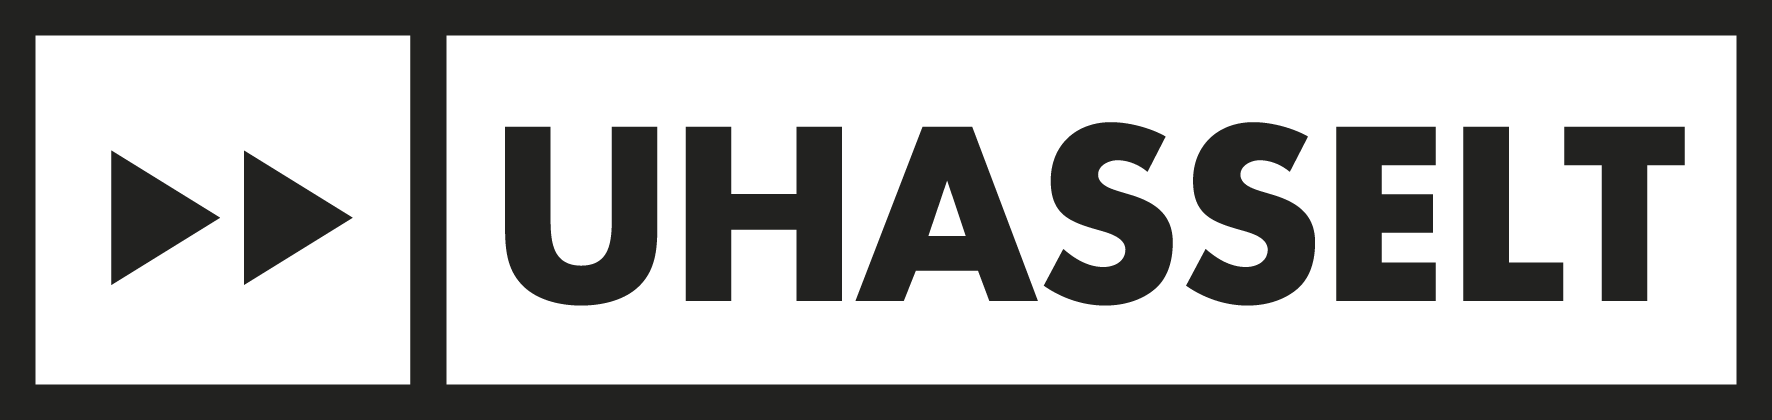

***PART 1.1 Warming up:***

***NAME : AARYAN KAUSHIK\
STUDENT ID : 2159244***

***NOTE: REPORT AT THE END***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#1.1.1  Use feature extraction with the VGG16 classifier


#### 1 dense layer

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.applications import VGG16


In [ ]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()


169001437/169001437 [==============================] - 3s 0us/step


In [ ]:
# Extracting the VGG16 features and corresponding labels
x_train = tf.keras.applications.vgg16.preprocess_input(x_train)
x_test = tf.keras.applications.vgg16.preprocess_input(x_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=100)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=100)


In [ ]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg_model.summary()

In [ ]:
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(256, activation='relu')
dense_layer_2 = layers.Dense(100, activation='softmax')


In [ ]:
model_1 = keras.Sequential([
    vgg_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2
])


In [ ]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history_1 = model_1.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/10
782/782 [==============================] - 49s 39ms/step - loss: 4.4427 - accuracy: 0.0257 - val_loss: 4.1521 - val_accuracy: 0.0385
Epoch 2/10
782/782 [==============================] - 31s 39ms/step - loss: 4.0210 - accuracy: 0.0535 - val_loss: 3.8215 - val_accuracy: 0.0779
Epoch 3/10
782/782 [==============================] - 31s 40ms/step - loss: 3.7706 - accuracy: 0.0837 - val_loss: 3.6818 - val_accuracy: 0.0951
Epoch 4/10
782/782 [==============================] - 31s 40ms/step - loss: 3.5481 - accuracy: 0.1146 - val_loss: 3.5565 - val_accuracy: 0.1319
Epoch 5/10
782/782 [==============================] - 30s 38ms/step - loss: 3.2923 - accuracy: 0.1567 - val_loss: 3.2261 - val_accuracy: 0.1713
Epoch 6/10
782/782 [==============================] - 30s 38ms/step - loss: 3.0646 - accuracy: 0.2011 - val_loss: 3.1498 - val_accuracy: 0.1983
Epoch 7/10
782/782 [==============================] - 31s 40ms/step - loss: 2.9164 - accuracy: 0.2286 - val_loss: 2.9649 - val_accuracy:

In [ ]:
test_loss, test_acc = model_1.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


313/313 [==============================] - 4s 10ms/step - loss: 2.8252 - accuracy: 0.2735
Test accuracy: 0.273499995470047


In [ ]:
model_1.save('/content/drive/MyDrive/model_1.h5')

In [ ]:
predictions = model_1.predict(x_test)
predicted_images = tf.argmax(predictions, axis=1)
predicted_images

313/313 [==============================] - 4s 12ms/step


<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([95, 33, 72, ..., 27, 63, 70])>

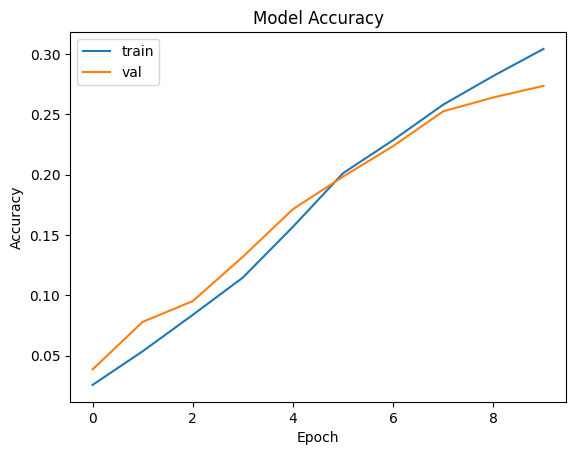

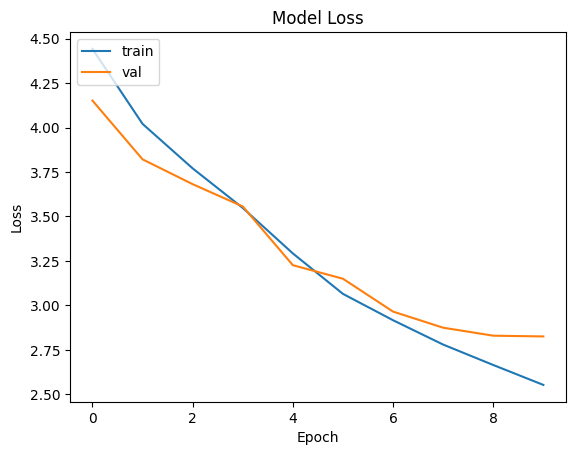

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### 2 dense layer

In [ ]:
flatten_layer_2 = layers.Flatten()
dense_layer_1 = layers.Dense(256, activation='relu')
dense_layer_2 = layers.Dense(128, activation='relu')
dense_layer_3 = layers.Dense(100, activation='softmax')


In [ ]:
model_1_2 = keras.Sequential([
    vgg_model,
    flatten_layer_2,
    dense_layer_1,
    dense_layer_2,
    dense_layer_3
])


In [ ]:
model_1_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history_1_2 = model_1_2.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/10
782/782 [==============================] - 36s 39ms/step - loss: 2.8076 - accuracy: 0.2683 - val_loss: 2.8170 - val_accuracy: 0.2608
Epoch 2/10
782/782 [==============================] - 31s 39ms/step - loss: 2.4719 - accuracy: 0.3260 - val_loss: 2.7425 - val_accuracy: 0.2932
Epoch 3/10
782/782 [==============================] - 31s 40ms/step - loss: 2.3760 - accuracy: 0.3443 - val_loss: 2.7591 - val_accuracy: 0.2858
Epoch 4/10
782/782 [==============================] - 32s 41ms/step - loss: 2.3029 - accuracy: 0.3603 - val_loss: 2.6644 - val_accuracy: 0.3258
Epoch 5/10
782/782 [==============================] - 32s 40ms/step - loss: 2.2171 - accuracy: 0.3805 - val_loss: 2.6575 - val_accuracy: 0.3137
Epoch 6/10
782/782 [==============================] - 31s 40ms/step - loss: 2.1344 - accuracy: 0.3963 - val_loss: 2.6929 - val_accuracy: 0.3134
Epoch 7/10
782/782 [==============================] - 30s 39ms/step - loss: 2.0884 - accuracy: 0.4097 - val_loss: 2.6450 - val_accuracy:

In [ ]:
test_loss, test_acc = model_1_2.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 2.6991 - accuracy: 0.3319
Test accuracy: 0.3319000005722046


In [ ]:
model_1_2.save('/content/drive/MyDrive/model_1_2.h5')

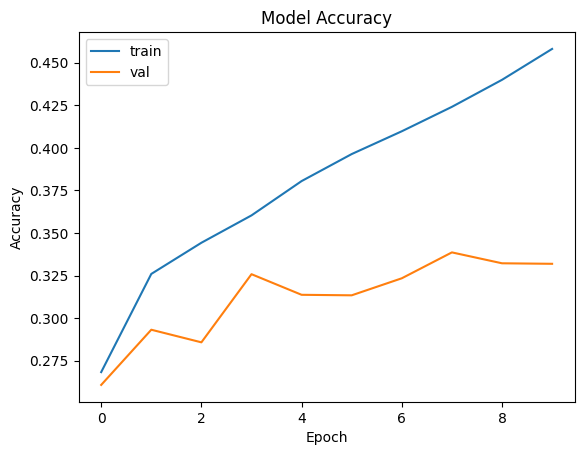

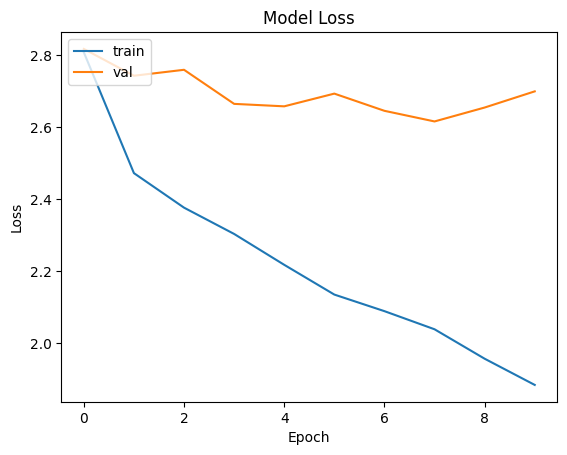

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history_1_2.history['accuracy'])
plt.plot(history_1_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history_1_2.history['loss'])
plt.plot(history_1_2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### 3 dense layer

In [ ]:
flatten_layer_3 = layers.Flatten()
dense_layer_1 = layers.Dense(512, activation='relu')
dense_layer_2 = layers.Dense(256, activation='relu')
dense_layer_3 = layers.Dense(128, activation='relu')
dense_layer_4 = layers.Dense(100, activation='softmax')


In [ ]:
model_1_3 = keras.Sequential([
    vgg_model,
    flatten_layer_2,
    dense_layer_1,
    dense_layer_2,
    dense_layer_3,
    dense_layer_4
])

In [ ]:
model_1_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history_1_3 = model_1_3.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/10
782/782 [==============================] - 38s 40ms/step - loss: 2.2750 - accuracy: 0.3949 - val_loss: 2.8181 - val_accuracy: 0.3271
Epoch 2/10
782/782 [==============================] - 31s 40ms/step - loss: 1.9746 - accuracy: 0.4470 - val_loss: 2.7659 - val_accuracy: 0.3193
Epoch 3/10
782/782 [==============================] - 30s 39ms/step - loss: 1.8554 - accuracy: 0.4729 - val_loss: 2.7236 - val_accuracy: 0.3247
Epoch 4/10
782/782 [==============================] - 32s 40ms/step - loss: 1.8582 - accuracy: 0.4692 - val_loss: 2.6315 - val_accuracy: 0.3496
Epoch 5/10
782/782 [==============================] - 31s 40ms/step - loss: 1.7860 - accuracy: 0.4867 - val_loss: 2.6934 - val_accuracy: 0.3430
Epoch 6/10
782/782 [==============================] - 31s 39ms/step - loss: 1.7153 - accuracy: 0.5037 - val_loss: 2.7434 - val_accuracy: 0.3534
Epoch 7/10
782/782 [==============================] - 31s 39ms/step - loss: 1.6761 - accuracy: 0.5137 - val_loss: 2.6938 - val_accuracy:

In [ ]:
test_loss, test_acc = model_1_3.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 2.6841 - accuracy: 0.3581
Test accuracy: 0.3580999970436096


In [ ]:
model_1_3.save('/content/drive/MyDrive/model_1_3.h5')

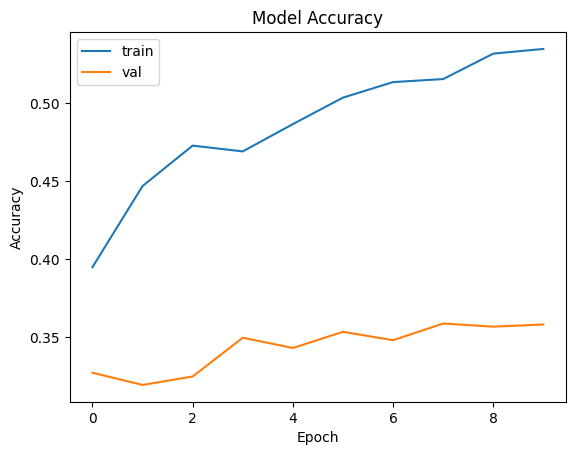

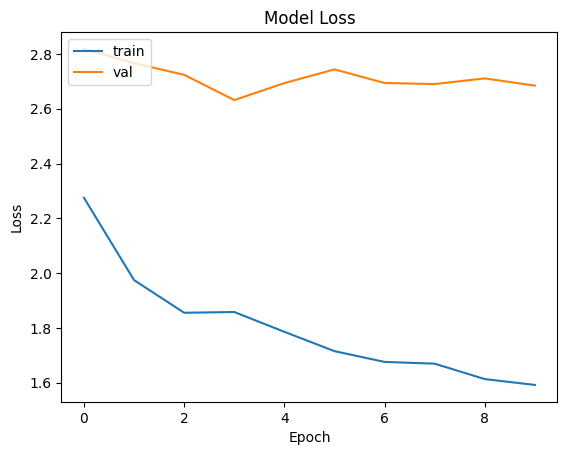

In [ ]:
# Plot training and validation accuracy
plt.plot(history_1_3.history['accuracy'])
plt.plot(history_1_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history_1_3.history['loss'])
plt.plot(history_1_3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

##TEST ACCURACY:
1 Dense Layer is 0.273499995470047\
2 Dense Layer is 0.3319000005722046\
3 Dense Layer is : 0.3580999970436096 


MODEL 2 and MODEL 3 are Overfitiing based on the plots


#1.1.2 Fine-tune the upper block of the convolutional base of the VGG16 network

In [ ]:

from tensorflow.keras import models, layers, optimizers


vgg_model.trainable = True
for layer in vgg_model.layers:
    layer.trainable = False

model_2 = models.Sequential()
model_2.add(vgg_model)
model_2.add(layers.Flatten())
model_2.add(layers.Dense(256, activation='relu'))
model_2.add(layers.Dropout(0.5)),
model_2.add(layers.Dense(128, activation='relu'))
model_2.add(layers.Dropout(0.5))
model_2.add(layers.Dense(100, activation='sigmoid'))

model_2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history_2 = model_2.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))



Epoch 1/10
782/782 [==============================] - 14s 16ms/step - loss: 2.9984 - acc: 0.3486 - val_loss: 2.8371 - val_acc: 0.3601
Epoch 2/10
782/782 [==============================] - 12s 15ms/step - loss: 1.9131 - acc: 0.4974 - val_loss: 2.8761 - val_acc: 0.3668
Epoch 3/10
782/782 [==============================] - 13s 16ms/step - loss: 1.8215 - acc: 0.5203 - val_loss: 2.9589 - val_acc: 0.3696
Epoch 4/10
782/782 [==============================] - 12s 16ms/step - loss: 1.7935 - acc: 0.5295 - val_loss: 3.0116 - val_acc: 0.3695
Epoch 5/10
782/782 [==============================] - 12s 16ms/step - loss: 1.7988 - acc: 0.5339 - val_loss: 3.0739 - val_acc: 0.3709
Epoch 6/10
782/782 [==============================] - 13s 16ms/step - loss: 1.8142 - acc: 0.5330 - val_loss: 3.0808 - val_acc: 0.3691
Epoch 7/10
782/782 [==============================] - 13s 16ms/step - loss: 1.8157 - acc: 0.5320 - val_loss: 3.1116 - val_acc: 0.3682
Epoch 8/10
782/782 [==============================] - 13s 16ms

In [ ]:
test_loss, test_acc = model_2.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 3.0500 - acc: 0.3673
Test accuracy: 0.36730000376701355


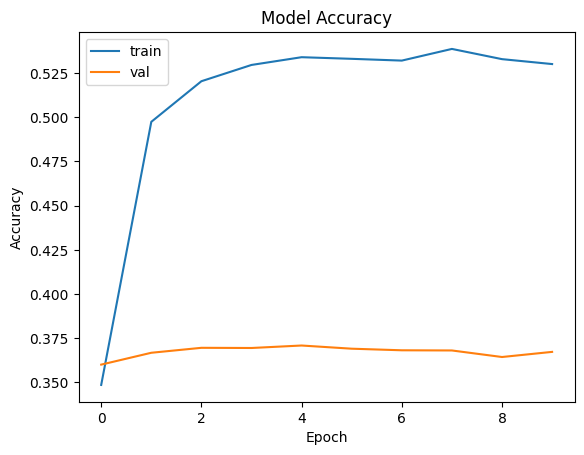

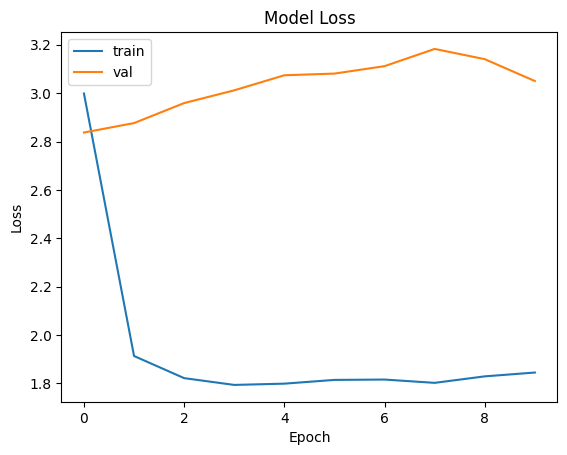

In [ ]:
# Plot training and validation accuracy
plt.plot(history_2.history['acc'])
plt.plot(history_2.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#1.1.3

In [ ]:

conv_base = VGG16(weights=None, include_top=False, input_shape=(32, 32, 3))

model_3 = models.Sequential()
model_3.add(conv_base)
model_3.add(layers.Flatten())
model_3.add(layers.Dense(256, activation='relu'))
model_3.add(layers.Dropout(0.5))
model_3.add(layers.Dense(128, activation='relu'))
model_3.add(layers.Dropout(0.5))
model_3.add(layers.Dense(100, activation='softmax'))

model_3.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001),
                loss='categorical_crossentropy',
                metrics=['acc'])

history_3 = model_3.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 35s 39ms/step - loss: 4.5845 - acc: 0.0143 - val_loss: 4.4987 - val_acc: 0.0227
Epoch 2/10
782/782 [==============================] - 31s 40ms/step - loss: 4.4683 - acc: 0.0252 - val_loss: 4.3321 - val_acc: 0.0419
Epoch 3/10
782/782 [==============================] - 31s 40ms/step - loss: 4.3069 - acc: 0.0422 - val_loss: 4.2246 - val_acc: 0.0621
Epoch 4/10
782/782 [==============================] - 30s 39ms/step - loss: 4.1679 - acc: 0.0577 - val_loss: 4.0507 - val_acc: 0.0921
Epoch 5/10
782/782 [==============================] - 31s 40ms/step - loss: 4.0194 - acc: 0.0796 - val_loss: 3.8470 - val_acc: 0.1060
Epoch 6/10
782/782 [==============================] - 30s 39ms/step - loss: 3.8431 - acc: 0.1046 - val_loss: 3.7156 - val_acc: 0.1259
Epoch 7/10
782/782 [==============================] - 30s 39ms/step - loss: 3.6621 - acc: 0.1307 - val_loss: 3.7071 - val_acc: 0.1393
Epoch 8/10
782/782 [==============================] - 31s 40ms

In [ ]:
test_loss, test_acc = model_3.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 3.1157 - acc: 0.2450
Test accuracy: 0.24500000476837158


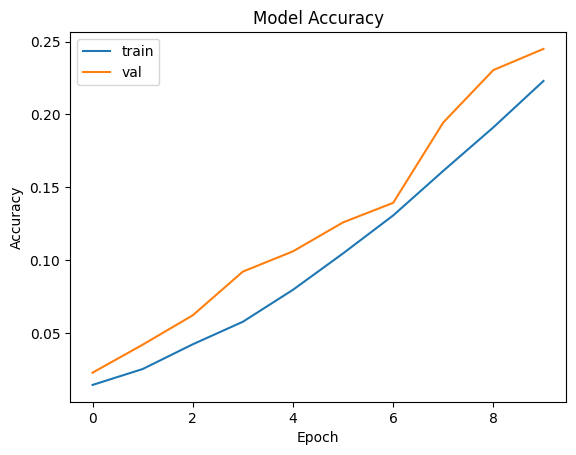

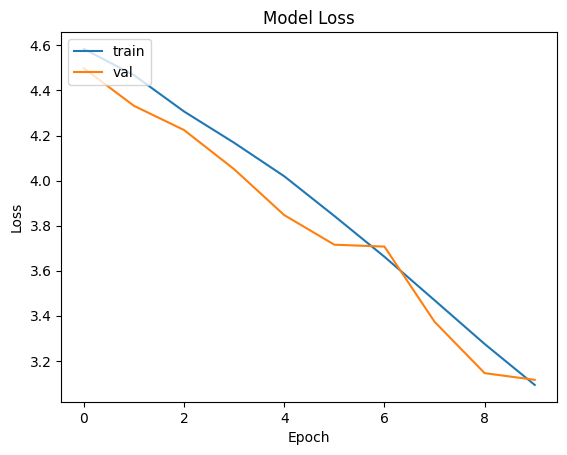

In [ ]:
# Plot training and validation accuracy
plt.plot(history_3.history['acc'])
plt.plot(history_3.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# COMMENTS:
***Does it make sense to use data augmentation for this model? Why? Does it make sense to use data augmentation with the previous method (method 2)?***

Yes, it makes sense to use data augmentation for the fine-tuning of the upper block of the VGG16 network. This is because we are training the model on a relatively small dataset, and data augmentation can help increase the effective size of the dataset and reduce overfitting.

For the previous method (method 2), data augmentation may still be useful, but to a lesser extent. Since we are training a dense network from scratch, we have more parameters to learn and a higher risk of overfitting. However, data augmentation may not be as effective as in the fine-tuning case, since we are not leveraging the pre-trained convolutional layers to extract features.

# REPORT

***Introduction:***\
The goal of this project was to investigate the impact of varying the number of dense layers in a VGG16 convolutional neural network on image classification accuracy. Three experiments were conducted, each with different numbers of dense layers. The first experiment had one dense layer, the second had two dense layers with dropout, and the third had two dense layers with no dropout. The dataset used was the CIFAR-100 dataset, which consists of 60000 32x32 color images in 100 classes. The dataset was split into training and testing sets in a ratio of 80:20.

***Experiment 1:***\
In Experiment 1, three models with different numbers of dense layers were trained and evaluated. The first model had only one dense layer, the second model had two dense layers, and the third model had three dense layers. All three models used the same VGG16 convolutional base. The models were trained for 10 epochs with a batch size of 64. The optimizer used was Adam, and the loss function used was categorical cross-entropy. The results showed that the model with three dense layers had the highest accuracy (0.3580), followed by the model with two dense layer (0.3319) and the model with one dense layers (0.2734).

***Experiment 2:***\
In Experiment 2, a VGG16 convolutional base with frozen layers was used. Two dense layers were added with dropout, and the model was trained for 10 epochs with a batch size of 64. The optimizer used was RMSprop, and the learning rate was set to 2e-5. The results showed that this model had an accuracy of 37% (0.3673)


***Experiment 3:***\
In Experiment 3, a VGG16 convolutional base with no pre-trained weights was used. Two dense layers were added with dropout, and the model was trained for 10 epochs with a batch size of 64. The optimizer used was RMSprop, and the learning rate was set to 0.0001. The results showed that this model had an accuracy of 24.5% (0.24500).

***Conclusion:***\
In conclusion, the results of the experiments indicate that the number of dense layers has an impact on image classification accuracy. The model with three dense layers had the highest accuracy in Experiment 1, while the models in Experiments 2 and 3 had lower accuracies. This suggests that fine-tuning a pre-trained VGG16 convolutional base with three dense layers may be the most effective approach for this image classification task. Further experimentation with different types of models and datasets could provide additional insights into the impact of dense layer architecture on image classification accuracy.